<a href="https://colab.research.google.com/github/fransarubbi/Data-Communication/blob/master/Modulaci%C3%B3n_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definiciones de código
ejecutar las proximas celdas antes que las próximas secciones

In [1]:
from __future__ import print_function
print("importando modulos numericos, ploteo, audio e interaccion")

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#clonar directorio de funciones auxiliares e introducirlo al path
!rm -r ./aux
!git clone https://github.com/rk1973unsl/aux/
import sys
sys.path.insert(0,'./aux')
print("Preparando todo!")
import funaux as tut


importando modulos numericos, ploteo, audio e interaccion
rm: cannot remove './aux': No such file or directory
Cloning into 'aux'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 172 (delta 9), reused 0 (delta 0), pack-reused 141
Receiving objects: 100% (172/172), 49.77 KiB | 303.00 KiB/s, done.
Resolving deltas: 100% (53/53), done.
Preparando todo!
importando modulos de ploteo, audio e interaccion
definiendo funciones auxiliares
listo!


## Definiciones generales
frecuencia de muestreo y tiempo total de simulacion para todo el cuaderno

In [2]:
# definiciones generales
fs = 8192       # frecuencia de muestreo
tmax=8192/fs    # tiempo de simulación =1 segundo


# Señales Banda Base
Generamos señales en banda base para probar la modulación AM y variantes

## Señal cosenoidal y senoidal

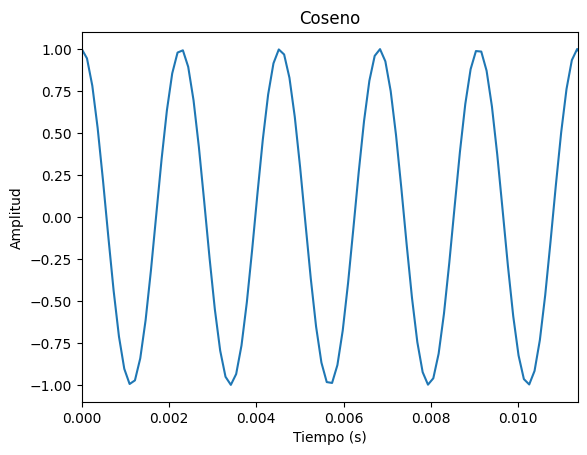

In [3]:
x_cos,t = tut.xcos(fs,440,tmax,1,0)          #cosenoidal
x_sin,t = tut.xcos(fs,440,tmax,1,-np.pi/2)   #senoidal = cosenoidal con fase de -90 grados o -pi/2

plt.figure
plt.title('Coseno')
tut.graft(x_cos,fs,[0, 5/440])


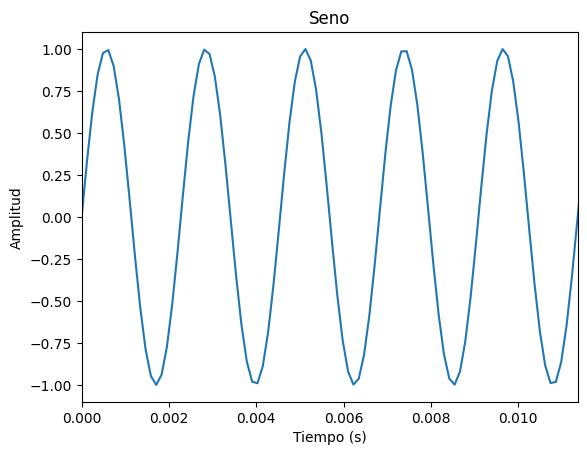

In [4]:
plt.figure
plt.title('Seno')
tut.graft(x_sin,fs,[0, 5/440])


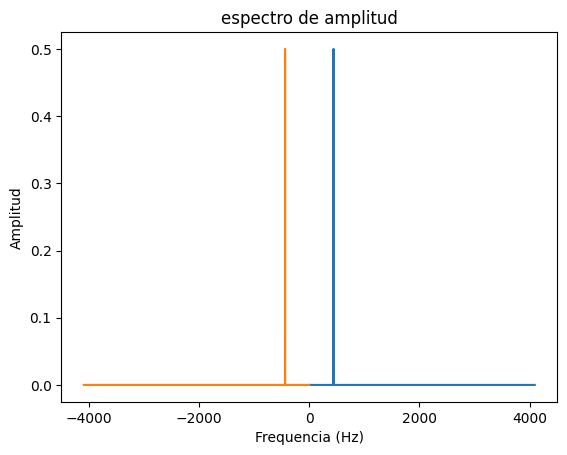

In [ ]:
plt.figure
plt.title('espectro de amplitud')
X_cos=tut.graff2l(x_cos,fs,[])

In [ ]:
Audio(x_cos, rate=fs)

## Señal Diente de Sierra



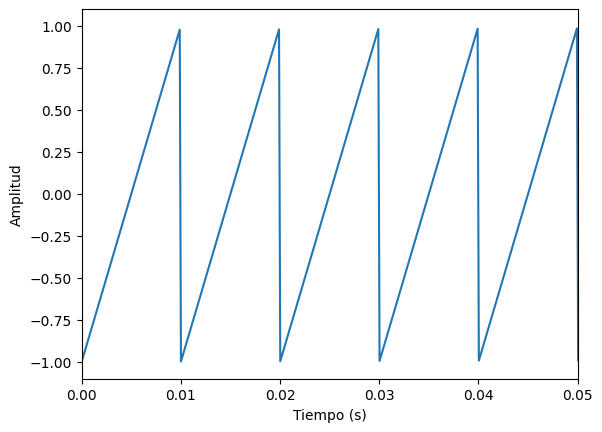

In [ ]:
periodo=.01
xds, t = tut.xtriang(fs, periodo, tmax, 'c', 'b')    # diente de sierra creciente bipolar
tut.graft(xds,fs,[0, 5*periodo])

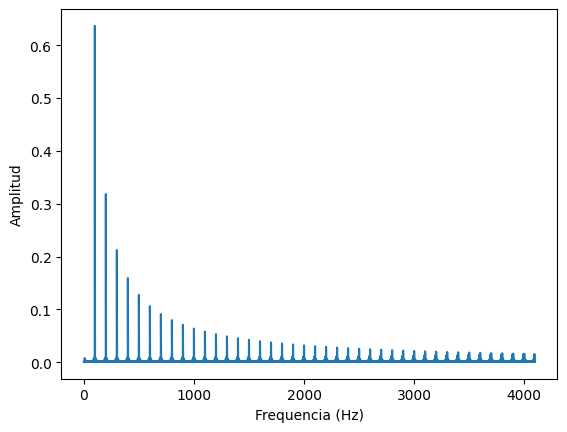

In [ ]:
XDS=tut.graff1l(xds,fs,[]);

In [ ]:
Audio(xds, rate=fs)

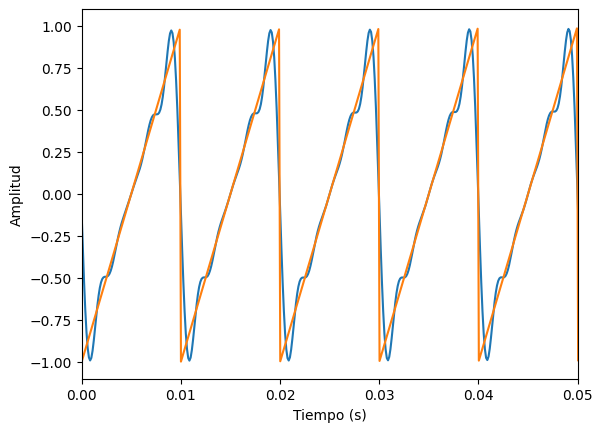

In [ ]:
XDSF=tut.pasabanda(XDS,fs,0,500) # filtramos los ultimos componentes de frecuencia (filtro pasa bajo ideal)
xdsf=np.real(np.fft.ifft(XDSF)*len(t));  # transformada inversa
m2=xdsf
tut.graft(xdsf,fs,[0,5*periodo])
tut.graft(xds,fs,[0,5*periodo])


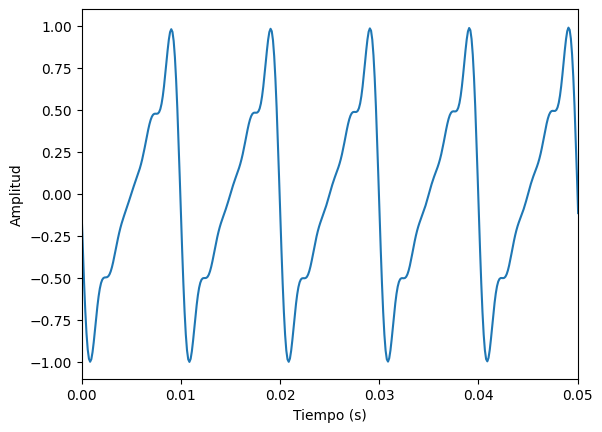

In [ ]:
xdsfb=np.real(tut.normalizarb(xdsf));
m=xdsfb
tut.graft(m,fs,[0,5*periodo])

En esta ultima triangular, se elimina la continua, por lo tanto, en el espectro tendria que desaparecer la muestra en la frecuencia cero

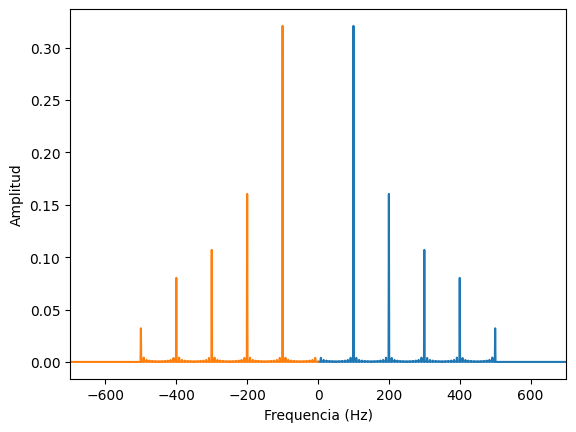

In [ ]:
M=tut.graff2l(xdsfb,fs,[-700,700]);

Efectivamente, la componente en la frecuencia cero desaparece porque la triangular ya no está montada sobre una continua. Y al aplicar un filtro pasabajos,  vemos que solo tenemos muestras hasta los 500 Hz.

In [ ]:
Audio(m, rate=fs)

## Ruido

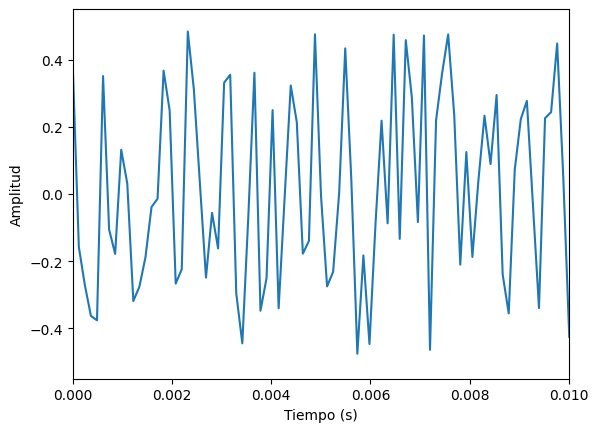

In [ ]:
n=np.random.rand(len(t))-.5
tut.graft(n,fs,[0,periodo])



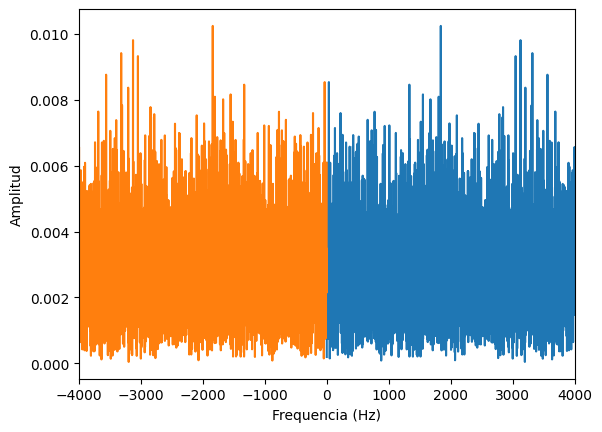

In [ ]:
N=tut.graff2l(n,fs,[-4000,4000]);

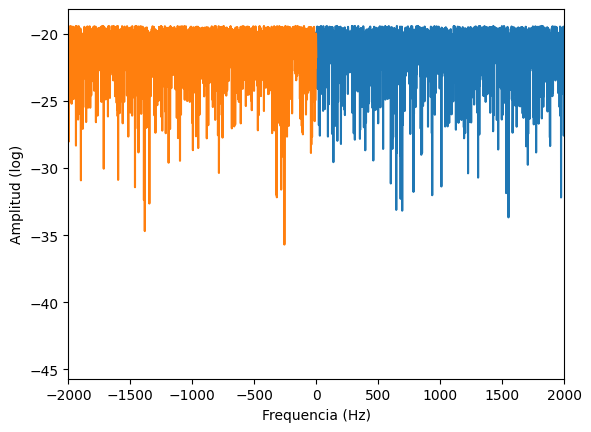

In [ ]:
tut.espectro(N,fs,[-2000,2000]);

In [ ]:
Audio(n, rate=fs)

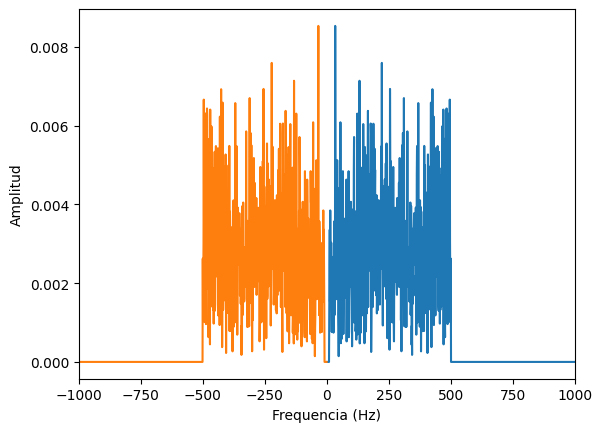

In [ ]:

nc =len(N)

#limites de frecuencias pasabanda 10 a 500 Hz
N2=tut.pasabanda(N,fs,10,500)

#retorno al dominio del tiempo
n2=np.real(np.fft.ifft(N2)*nc);

tut.graff2l(n2,fs,[-1000,1000]);


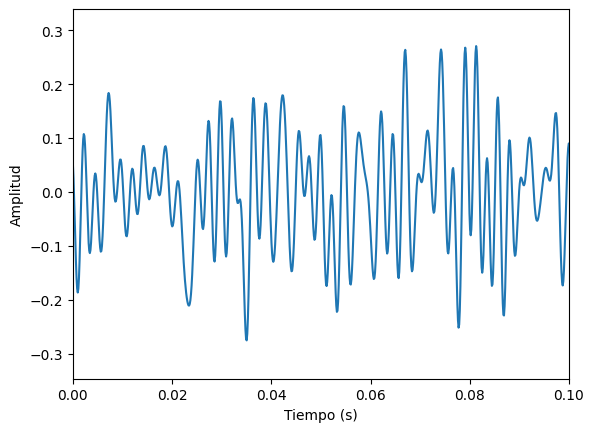

In [ ]:
tut.graft(n2,fs,[0,10*periodo])

In [ ]:
Audio(n2, rate=fs)

# Modulación AM


## Batido de dos señales

Hacemos ahora el producto entre una sinusoidal y dos señales de banda base de ancho de banda limitada (filtrado). Este producto se llama comunmente batido.

**Actividad 1:** ¿Cuales son las frecuencias mínima y máxima de la señal sinusoidal (portadora), si la frecuencia de muestreo es de 8192sps y el ancho de banda de las señales en banda base es de 500Hz?

> respuesta

**Actividad 2:** ¿A que equivale, en el dominio del tiempo, la convolución de dos funciones F y G en el dominio de la frecuencia?


$$f(t) \cdot g(t) \leftrightarrow F(f) * G(f)$$

**Actividad 3:** ¿Cual es el resultado de la convolución (en el dominio de la frecuencia) de una señal de banda limitada con una señal impulso?


**Actividad 4:** ¿A que señal en el tiempo le corresponde un impulso en el dominio de la frecuencia?


**Actividad 5:** en base a las preguntas anteriores y al ejercicio propuesto, ¿Cual es el resultado esperado de batir una señal?

### Definicion de portadora





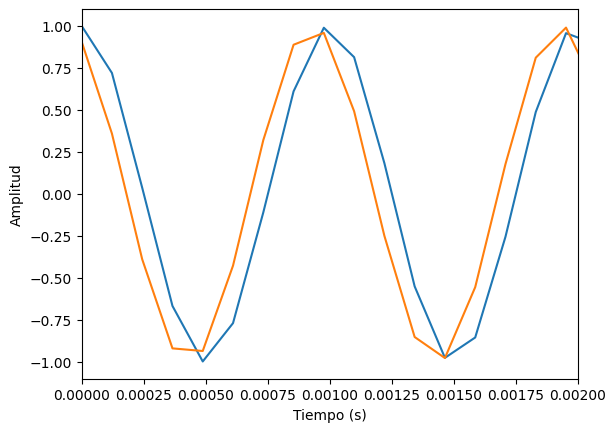

In [ ]:
#frecuencia de portadora (cumplir los requisitos de actividad 1)
fc=1000
port_tx,t=tut.xcos(fs,fc,1,1,0)
port_rx,t=tut.xcos(fs,fc,1,1,25*np.pi/180)   # desfasaje de 25 grados en oscilador de receptor
tut.graft(port_tx,fs,[0,2/fc])
tut.graft(port_rx,fs,[0,2/fc])

**Actividad 6:** ¿Cual es el periodo de la portadora y cuantas muestras se tiene por periodo, a la frecuencia de muestreo seleccionada?

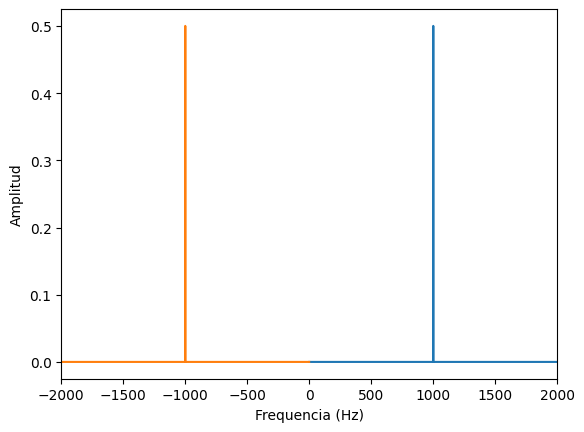

In [ ]:
tut.graff2l(port_tx,fs,[-2000,2000]);

### mensaje de banda limitada
Utilizaremos primero la señal diente de sierra filtrada bipolar **xdsfb** (valores de -1 a 1)

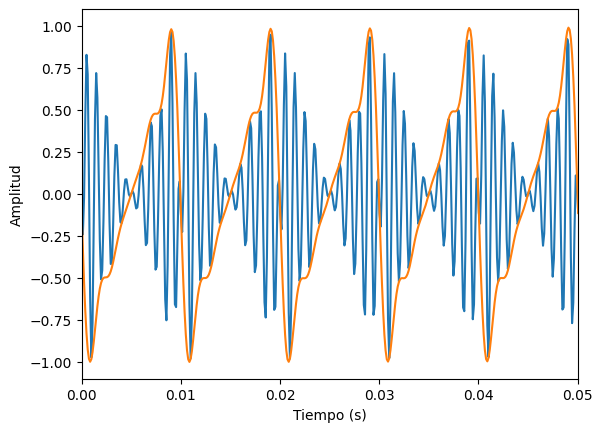

In [ ]:
batido1=port_tx*xdsfb

tut.graft(batido1,fs,[0, 5*periodo]);
tut.graft(xdsfb,fs,[0, 5*periodo]);
#tut.graft(portadora,fs,[0, 5*periodo])


**Actividad 7:** Describa lo observado en el la imagen anterior del dominio del tiempo, considerando la escursion de la señal batida y la fase de la señal resultante

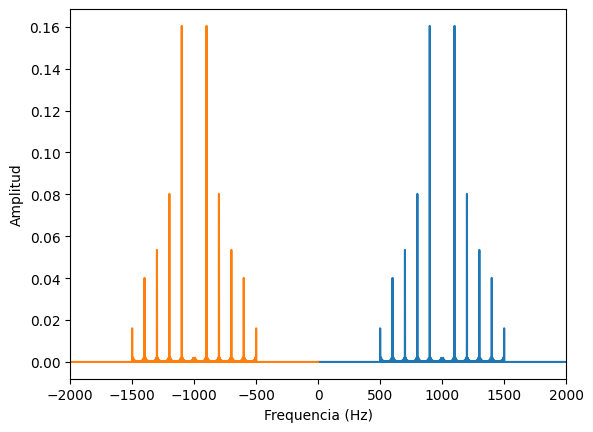

In [ ]:
tut.graff2l(batido1,fs,[-2000,2000]);

**Actividad 8:** Describa lo observado en el la imagen anterior del dominio de la frecuencia, considerando el ancho de banda de la señal moduladora y la existencia o no de portadora en el espectro final

### Doble batido y filtrado
Volvemos a multiplicar por la señal portadora y analizamos lo obtenido

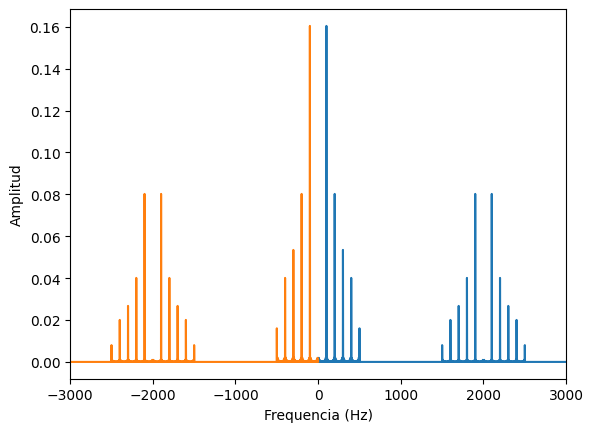

In [ ]:
batido2=port_tx*batido1
BAT2=tut.graff2l(batido2,fs,[-3000,3000]);

**Actividad 9:** Describa lo observado en la imagen anterior. ¿Como esta compuesto el espectro de la señal batida? ¿A que se debe la componente de frecuencia de mayor amplitud?


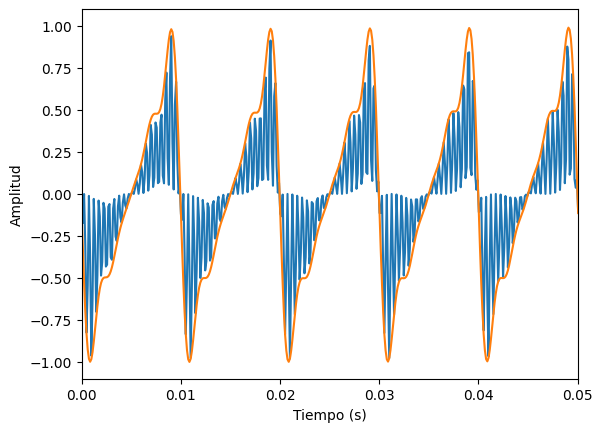

In [ ]:
tut.graft(batido2,fs,[0, 5*periodo])
tut.graft(xdsfb,fs,[0, 5*periodo]);

In [ ]:
Audio(batido2, rate=fs)

**Actividad 10:** Describa lo observado en la imagen anterior, y comparela con las señales mensaje y portadora.


filtramos ahora las frecuencias espurias (doble de fc) y lo comparamos con el mensaje original

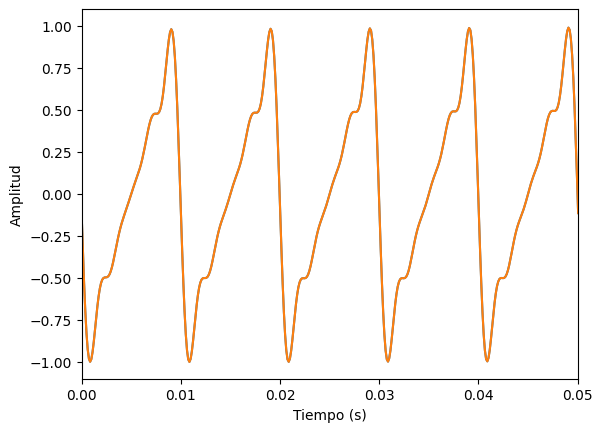

In [ ]:
BAT2F=tut.pasabanda(BAT2,fs,0,1000)
bat2fs=np.real(np.fft.ifft(BAT2F)*len(t))
tut.graft(2*bat2fs,fs,[0, 5*periodo])    # multiplico por dos para que tengan la misma amplitud y comparar mensaje transmitido y recibido
tut.graft(xdsfb,fs,[0, 5*periodo])

**Actividad 11:** Describa lo observado en la imagen anterior.

## doble batido fuera de fase
A la señal modulada (batido simple) la volvemos a batir pero esta vez por una señal desfazada (oscilador local del receptor)

In [ ]:
print(np.cos(180*np.pi/180))   # coseno de la diferencia de fase entre Tx y Rx
print(np.cos(180*np.pi/180)*.16)

-1.0
-0.16


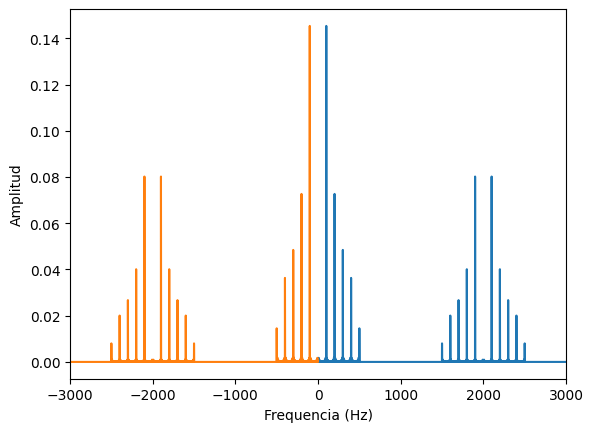

In [ ]:
batido2ff=port_rx*batido1
BAT2FF=tut.graff2l(batido2ff,fs,[-3000,3000]);

**Actividad 12:** Compare las amplitudes del espectro obtenido con el caso del doble batido en fase

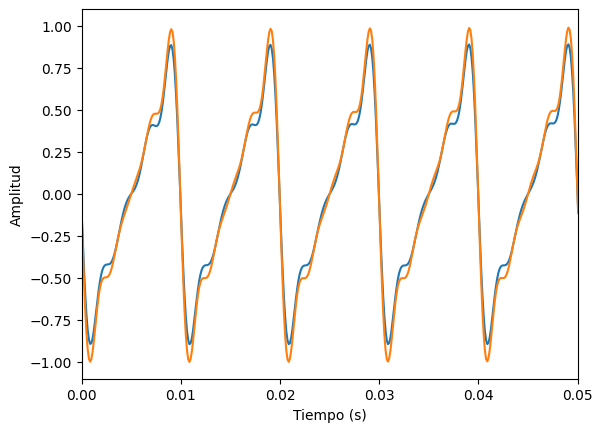

In [ ]:
BAT2FFF=tut.pasabanda(BAT2FF,fs,0,500)
bat2fsff=np.real(np.fft.ifft(BAT2FFF)*len(t))
tut.graft(2*bat2fsff,fs,[0, 5*periodo]) # multiplico por dos para que tengan la misma amplitud y comparar mensaje transmitido y recibido
                                        # para el caso de diferenica de fase entre Tx y Rx

tut.graft(xdsfb,fs,[0, 5*periodo])

**Actividad 13:** Compare las amplitudes de las señales demoduladas, con el caso del doble batido en fase

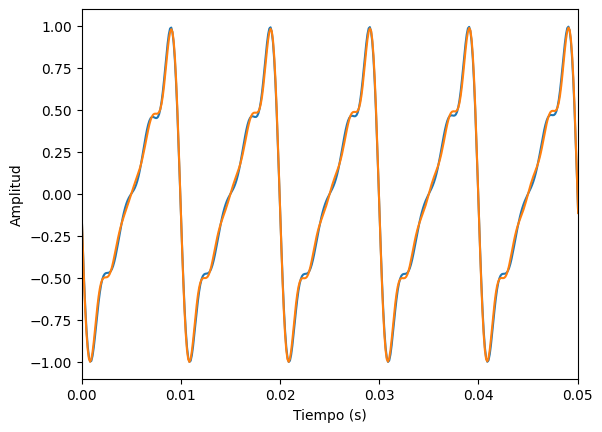

In [ ]:
# para comparar las señales, las normalizamos y ploteamos juntas
tut.graft(tut.normalizarb(bat2fsff),fs,[0, 5*periodo])
tut.graft(tut.normalizarb(xdsfb),fs,[0, 5*periodo])

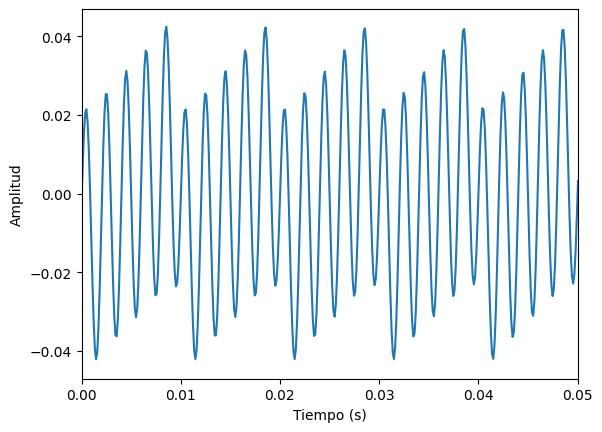

In [ ]:
# diferencia entre señales transmitida y demodulada (normalizadas)
tut.graft(tut.normalizarb(bat2fsff)-tut.normalizarb(xdsfb),fs,[0, 5*periodo])


**Actividad 14:** repita el doble batido fuera de fase para una diferencia de fase de 85, 90 y  180 grados. ¿Cuanto influye la diferencia de fase entre Tx y Rx?

In [ ]:
port_rx,t=tut.xcos(fs,fc,1,1,180*np.pi/180)   # desfasaje de 85 grados en oscilador de receptor

**Actividad 15:** en la siguiente expresion:
$$y(t)=A(t) \cdot cos(\omega \cdot t+\phi)=A(t) \cdot cos(2 \cdot \pi \cdot f \cdot t+\phi)$$


¿A que corresponde $A(t)$ en la simulación del batido? ¿y el segundo factor $cos(2 \cdot \pi \cdot f \cdot t+\phi)$?


## Señal ruido de banda limitada
  **Actividad 16:** Repetir la simulación anterior para la señal de ruido de banda limitada **n2**, describir lo observado en el dominio del tiempo y de la frecuencia


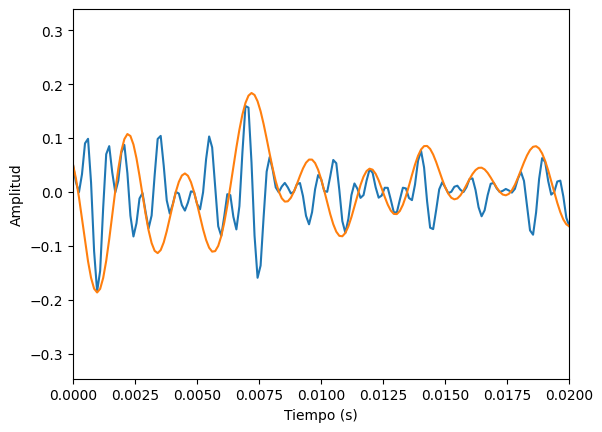

In [ ]:
batido3=port_tx*n2
tut.graft(batido3,fs,[0, 2*periodo]);
tut.graft(n2,fs,[0, 2*periodo]);

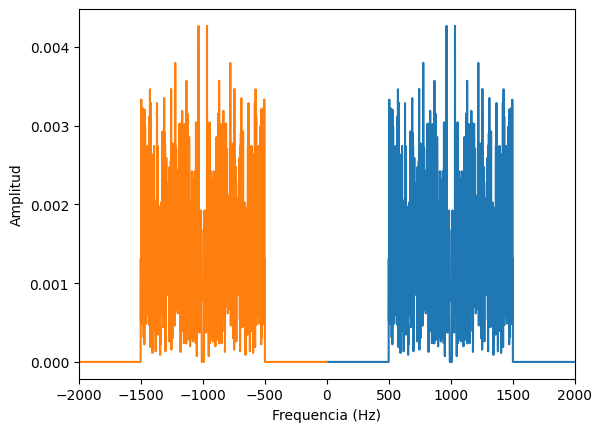

In [ ]:
tut.graff2l(batido3,fs,[-2000,2000]);

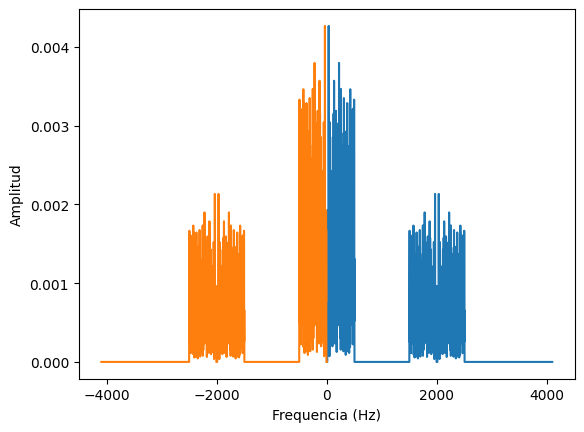

In [ ]:
bat4=batido3*port_tx
BAT4=tut.graff2l(bat4,fs,[]);

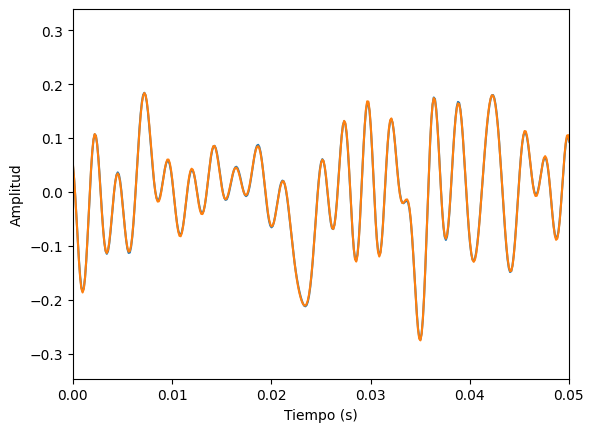

In [ ]:
BAT4f=tut.pasabanda(BAT4,fs,0,500)
bat4f=np.real(np.fft.ifft(BAT4f)*len(t))
tut.graft(2*bat4f,fs,[0, 5*periodo])
tut.graft(n2,fs,[0, 5*periodo])

## Señal AM completa
La propieda fundamental del batido es la translación en frecuencia. Es matematicamente simple pero tiene dos probelemas principales:


*   Si la señal de banda limitada (mensaje) no tiene componente de continua, no aparece una frecuencia de portadora en el espectro final. Esto complica la sintonía del receptor.

*   Si la señal mensaje es bipolar, aparecen inversiones de fase y es mas dificil de recuperar a partir de la envolvente de la señal batida.

Para pasar estas limitaciones, se agregan dos elementos en la modulacion de amplitud $A(t)$ en

$$y(t)=A(t) \cdot cos(2 \cdot \pi \cdot f_c \cdot t+\phi)$$

y haciendo $A(t)$:

$$A(t)=[1+m\cdot x(t)]$$

y descartando la fase constante $\phi$

nos queda:

 $$ y_{AM}(t)=[1+m\cdot x(t)] \cdot cos(2 \cdot \pi \cdot f_c \cdot t)$$



(que es la equación de la modulacion de amplitud completa)





**Actividad 17:** ¿A que corresponden el termino **1** y el factor $m$?

Simulamos ahora la modulacion AM con la señal mensaje **xdsfb** :

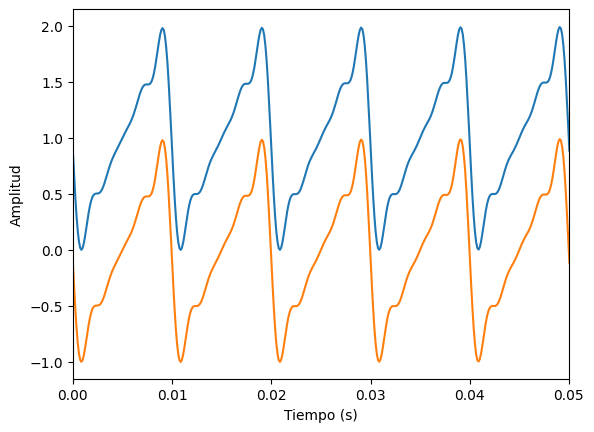

In [ ]:
m=1
a = 1+m*xdsfb   # 1 + m * mensaje =a(t)
tut.graft(a,fs,[0,5*periodo])
tut.graft(xdsfb,fs,[0,5*periodo])



**Actividad 18:** Describa la señal ploteada **a** y su relacion con el mensaje original **xdsfb**. ¿Que sucede si cambiamos el valor de m por 2, 0.5 y -1? ¿como afectarían estos casos la fase del batido?

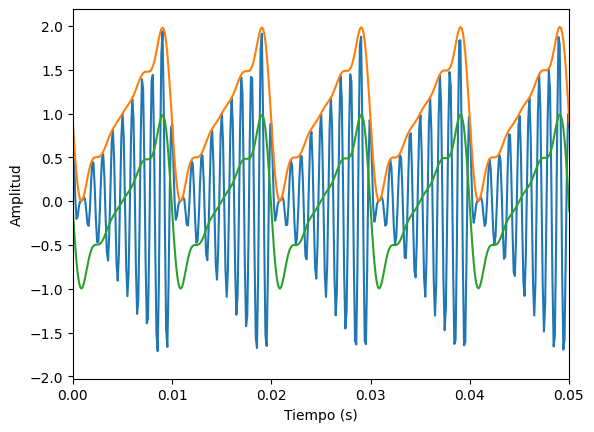

In [ ]:
yam=a * port_tx  # (1  + m * x) * portadora = 1 * portadora + m * x * portadora
tut.graft(yam, fs, [0, 5*periodo]);
tut.graft(a,fs,[0,5*periodo])
tut.graft(xdsfb,fs,[0,5*periodo])


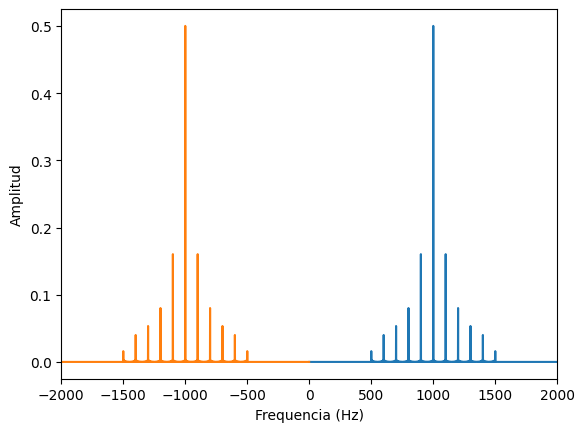

In [ ]:
YAM=tut.graff2l(yam,fs,[-2000,2000])

**Actividad 19:** describa la imagen anterior


## Demodulación por doble batido



**Actividad 20:** multiplique la señal modulada por la portadora nuevamente (doble batido) , grafique y describa el espectro.

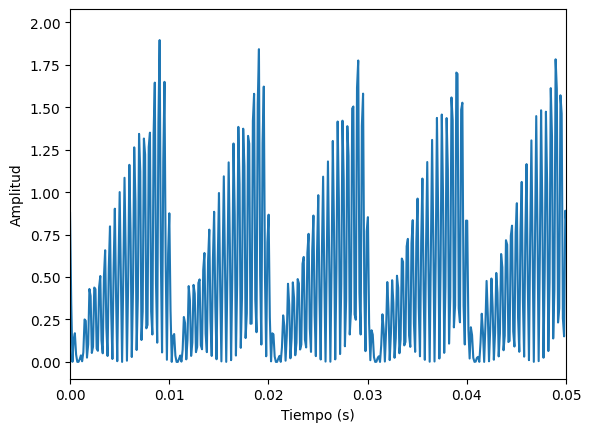

In [ ]:
ydb=yam*port_tx; # ((1+mx)portadora)*portadora = (1+mx) * portadora^2
tut.graft(ydb,fs,[0,5*periodo]);

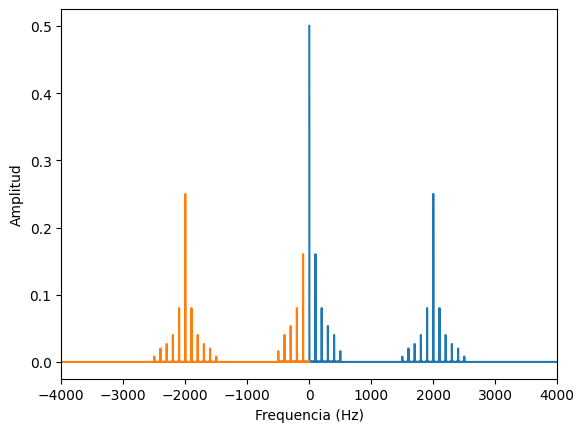

In [ ]:
YDB=tut.graff2l(ydb,fs,[-4000, 4000])

describir espectro anterior



$$f_c \pm f_c = 2\cdot f_c ; 0 $$  



**Actividad 21:** a la señal obtenida por doble batido, aplique un filtro pasabajo y antitransforme. Explique lo realizado.

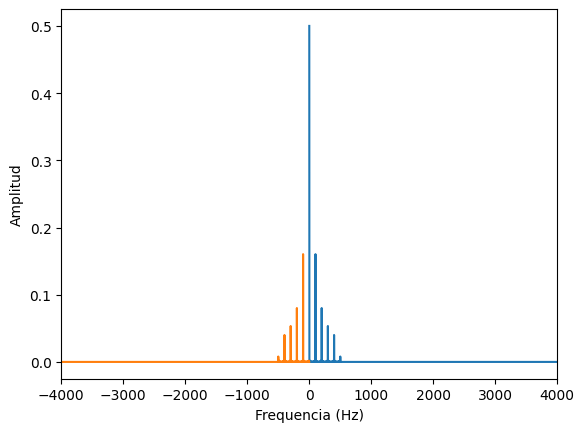

In [ ]:
YDBF=tut.pasabanda(YDB,fs,0,500);  # dejo solo banda base 0 - 500 Hz

ydbf=np.real(np.fft.ifft(YDBF)*len(YDBF));  #antitransformada de la señal doble batido filtrada

tut.graff2l(ydbf,fs,[-4000,4000]);

Al aplicar un filtro pasa bajo, estamos eliminando los espectros que nos sobran y de ese modo quedarnos solo con lo que nos interesa, que es el de la banda base. Se observa una gran componente de continua

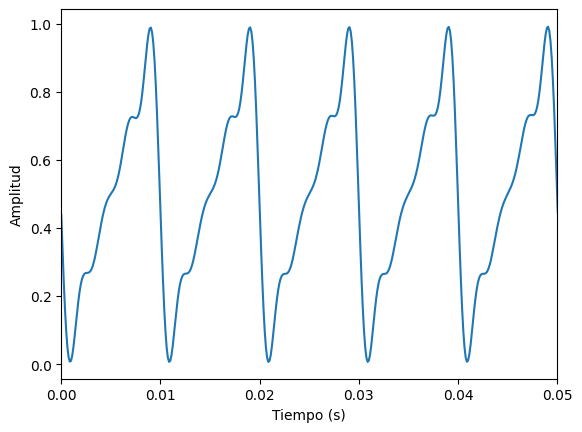

In [ ]:
tut.graft(ydbf,fs,[0,5*periodo])

**Actividad 22:** Compare AM completa y AM-SC desde el punto de vista de la potencia y ancho de banda de transmisión.

### Doble Banda Lateral
**Actividad 23:** Simule una modulación DBL (superior o inferior) utilizando las señales **xdsfb**, port_tx y el filtro pasabanda ideal.
Demodule mediante el metodo de doble batido y filtrado. Grafique y comente cada paso en el proceso y compare los espectros de DBL-PS, AM completa y DBL.

## Diagrama de trapecio
Consiste en realizar un diagrama carteciano con el mensaje en el eje *X* y la señal modulada (AM completa) en el eje *Y*.
Por lo general se usa una señal moduladora sinusoidal, pero se puede utilizar cualquier señal.

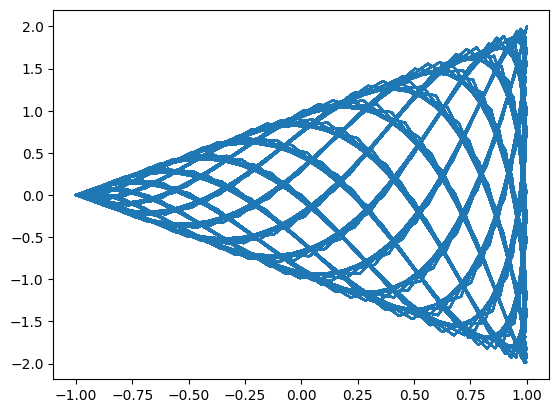

In [ ]:
m=1 # indice de modulación

AM=(1+m*x_cos)*port_tx #señal AM completa

plt.plot(x_cos,AM)


**Actividad 24:** repetir para distintos valores de $m = 0, 0.25, 0.5, 1, 1.5, 2$ y describir lo observado


